In [12]:
import lxml
import re
import requests
import tweepy
import csv, json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
from bs4 import BeautifulSoup
from tweepy import OAuthHandler
from nltk import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [13]:
huffington = pd.read_csv('huffington_tokens.csv', index_col=0)
huffington = huffington[0:1000]
X_huffington = huffington['text'].tolist()
X_huffington = [str(x) for x in X_huffington]
y_huffington = [False]*len(X_huffington)

print(len(y_huffington),len(X_huffington))

1000 1000


In [14]:
huffington2 = pd.read_csv('huffington_tokens_w2.csv', index_col=0)
huffington2 = huffington2[0:1000]
X_huffington2 = huffington2['text'].tolist()
X_huffington2 = [str(x) for x in X_huffington2]
y_huffington2 = [False]*len(X_huffington2)

print(len(y_huffington2),len(X_huffington2))

1000 1000


In [15]:
breitbart = pd.read_csv('breitbart_tokens.csv', index_col=0)
X_breitbart = breitbart['text'].tolist()
X_breitbart = [str(x) for x in X_breitbart]
y_breitbart = [True]*len(X_breitbart)
print(len(y_breitbart),len(X_breitbart))

1045 1045


In [16]:
breitbart2 = pd.read_csv('breitbart_tokens_w2.csv', index_col=0)
X_breitbart2 = breitbart2['text'].tolist()
X_breitbart2 = [str(x) for x in X_breitbart2]
y_breitbart2 = [True]*len(X_breitbart2)
print(len(y_breitbart2),len(X_breitbart2))

1045 1045


In [17]:
X = X_breitbart + X_huffington
y = y_breitbart + y_huffington
      
partisan_data = pd.DataFrame({"source": y, "text": X})
partisan_data = partisan_data[partisan_data.text.isnull()==False]    
partisan_data.to_csv("partisan.csv")
partisan_data.head()

,source,text
0,True,jordan said we moving lot quicker repeal healt...
1,True,isnt dam its primary storage facility located ...
2,True,after days deliberating extremely disappointin...
3,True,coincidence i want thank president agent orang...
4,True,emergency order extends butte sutte yuba count...


In [18]:
X2 = X_breitbart2 + X_huffington2
y2 = y_breitbart2 + y_huffington2
      
partisan_data2 = pd.DataFrame({"source": y2, "text": X2})
partisan_data2 = partisan_data2[partisan_data2.text.isnull()==False]    
partisan_data2.to_csv("partisan2.csv")
partisan_data2.head()

,source,text
0,True,global traffic research firm inrix reports ang...
1,True,realtor chad curry recently talked home buyer ...
2,True,etown college dems @etowncollegedem campaign ...
3,True,resolution states austin isd policy bars any a...
4,True,friday one hundred protesters affiliated phill...


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
X, X_cv, y, y_cv = train_test_split(X, y, test_size=0.30, random_state=1234)
X_train[1:10]

['research heritage foundation shows carbon tax little help environment average american heritage foundation study analyzed  per ton tax carbon similar bakers  tax per ton carbon think tank study suggests effects carbon tax would be carbon tax would reduce global temperatures much either according heritage foundation study united states cut carbon emissions immediately would  degree celsius drop global temperature industrialized nations eliminated carbon emissions would  degree celsius drop global temperature.climate activists epa administrators lisa jackson gina mccartney former secretary state john kerry admit substantial reduction american carbon emissions substantially impact global co levels united nations climate chief christiana figueres admitted ulterior motives enacting carbon tax figeures told reporters this probably difficult task ever given ourselves intentionally transform economic development model first time human history continued this first time history mankind setting

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=1234)
X2, X_cv2, y2, y_cv2 = train_test_split(X2, y2, test_size=0.30, random_state=1234)
X_train2[1:10]

['although author piece writes milo negative terms also notes editors performance maher would make viewers wonder leftists rioting him also notes mahers scorn liberals take bait milo heard much yiannopoulos without ever exposed yes live liberal bubble defense air much cleaner here chief reaction controversial figure watching show wonder this people rioting over lightweight russell brand wannabe maher seemed less offended guest admittedly best behavior liberals scorned taking bait impish british fag sitting next him concluded scheck otherwise show fairly typical episode full article hollywood reporter',
 'sunday abcs this week sen rand paul r-ky addressed sen john mccains r-az criticism trump administration karl think its fair say second none senate comes fighting civil liberties let ask specifically hes saying press saying media enemy american people agree that paul its something would say would say bias think its fair point bias media sides right left its hard find objective gotten pa

In [21]:
# Train Breitbart Model
clf = Pipeline([
    ('vectorizer', CountVectorizer(min_df=5)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression()),
])

clf.fit(X_train, y_train)
y_hat = clf.predict(X_cv)
print(sum(y_hat==y_cv)/len(y_cv))

print(sum(y_hat))
print(sum(y_cv))

probs = clf.predict_proba(X_cv)

TP = sum([y1 == True and y1==y2 for (y1,y2) in zip(y_hat, y_cv)])
FP = sum([y1 == True and y1!=y2 for (y1,y2) in  zip(y_hat, y_cv)])
TN = sum([y1 == False and y1==y2 for (y1,y2) in zip(y_hat, y_cv)])
FN = sum([y1 == False and y1!=y2 for (y1,y2) in zip(y_hat, y_cv)])

precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*precision*recall/(precision+recall)

print(precision, recall, F1)

#print(probs[:,1])

0.840390879479
313
311
0.840255591054 0.845659163987 0.842948717949


In [22]:
# Train Breitbart Model
clf2 = Pipeline([
    ('vectorizer', CountVectorizer(min_df=5)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression()),
])

clf2.fit(X_train2, y_train2)
y_hat2 = clf.predict(X_cv2)
print(sum(y_hat2==y_cv2)/len(y_cv2))

print(sum(y_hat2))
print(sum(y_cv2))

probs = clf.predict_proba(X_cv2)

TP = sum([y1 == True and y1==y2 for (y1,y2) in zip(y_hat2, y_cv2)])
FP = sum([y1 == True and y1!=y2 for (y1,y2) in  zip(y_hat2, y_cv2)])
TN = sum([y1 == False and y1==y2 for (y1,y2) in zip(y_hat2, y_cv2)])
FN = sum([y1 == False and y1!=y2 for (y1,y2) in zip(y_hat2, y_cv2)])

precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*precision*recall/(precision+recall)

print(precision, recall, F1)

#print(probs[:,1])

0.830618892508
313
311
0.830670926518 0.836012861736 0.833333333333


In [23]:
def make_coefs_table(model):
    coefs = model.named_steps['classifier'].coef_
    features = model.named_steps['vectorizer'].get_feature_names()

    table = pd.DataFrame({"features": features, "coefficients": coefs.tolist().pop(0)})
    return(table.sort_values('coefficients', ascending = False))

    coefficients     features
0       1.317133       israel
1       1.242673         milo
2       1.236401   government
3       1.232818     migrants
4       1.219487           al
5       1.140461          gun
6       1.138754       police
7       1.037359         left
8       0.957670          per
9       0.932627  immigration
10      0.932243        added
11      0.922091         here
12      0.899539      islamic
13      0.887869         wing
14      0.883969     european
15      0.875490         cent
16      0.872933           eu
17      0.865217        texas
18      0.847644     minister
19      0.832311       campus


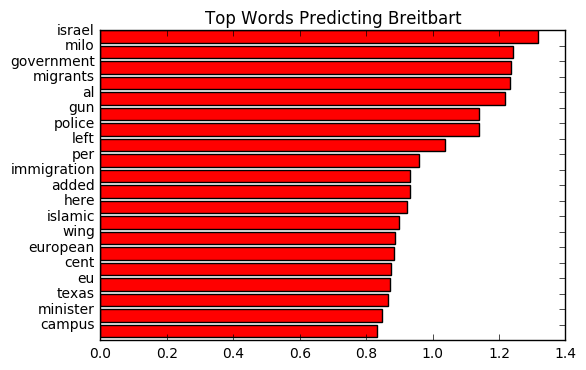

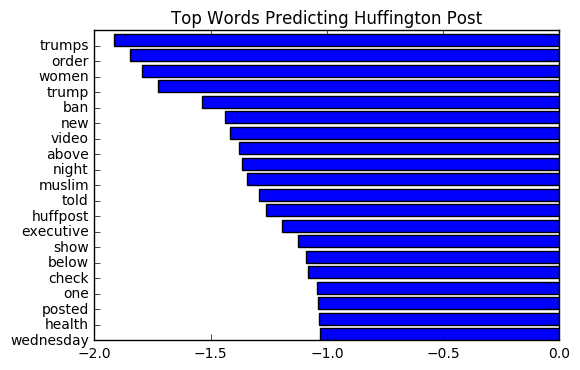

In [24]:
breitbart_words = make_coefs_table(clf)
breitbart_words = breitbart_words.reset_index(drop=True)
print(breitbart_words[0:20])

x_values = breitbart_words.coefficients[0:20]
y_values = breitbart_words.features[0:20]
y_axis = np.arange(0, 20, 1)

plt.barh(y_axis, x_values, align='edge', color = 'red')
plt.yticks(y_axis, y_values)
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.title('Top Words Predicting Breitbart')
plt.show()

x_values = breitbart_words.coefficients[-20:]
y_values = breitbart_words.features[-20:]
y_axis = np.arange(0, 20, 1)

plt.barh(y_axis, x_values, align='edge', color = 'blue')
plt.yticks(y_axis, y_values)
#plt.gca().invert_xaxis()
plt.title('Top Words Predicting Huffington Post')
plt.show()

In [25]:
probs = clf.predict_proba(X_test)
df = pd.DataFrame({'p': probs[:,1], 'predicted':y_hat, 'actual':y_test, 'text': X_test}).sort_values('p')
misclassified = df[(df.predicted!=df.actual)]
misclassified.head()

,actual,p,predicted,text
68,True,0.239737,False,disastrous first half patriots falcons jumped ...
162,True,0.242600,False,mckibben contributed numerous opinion pieces g...
377,True,0.260733,False,journalists countrys biggest outlets raked bad...
287,True,0.276766,False,for reason room got tv set cnn every day wake ...
341,True,0.319056,False,it totally undid could vote trump gayle mccorm...


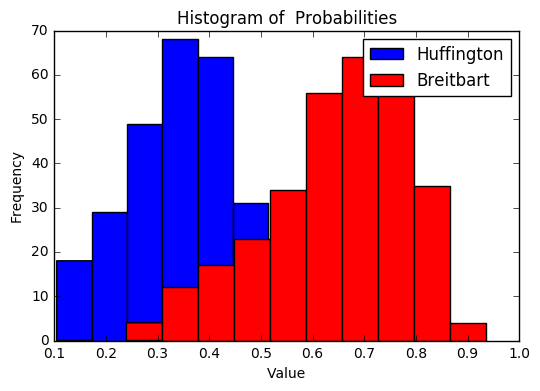

In [26]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py

h = plt.hist(df.p[df.actual==False], color = 'blue')
b = plt.hist(df.p[df.actual==True], color = 'red')
plt.title("Histogram of  Probabilities")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(['Huffington', 'Breitbart'])

fig = plt.gcf()
plt.show()


In [34]:
liberal = pd.read_csv('huffington_words.csv')
conservative = pd.read_csv('breitbart_words.csv')

top_liberal = liberal.features[0:100].tolist()
top_conservative = conservative.features[0:100].tolist()

common = [word for word in top_liberal if word in top_conservative]
unique_conservative = [word for word in top_conservative if word not in top_liberal]
unique_liberal = [word for word in top_liberal if word not in top_conservative]

def list_words(word_list):
    for word in word_list:
        print(word)
print("COMMON", len(common))
list_words(common)  
print("BREITBART", len(unique_conservative))
list_words(unique_conservative)
print("LIBERAL", len(unique_liberal))
list_words(unique_liberal)

COMMON 34
trumps
its
dont
thats
hes
didnt
were
im
theres
super
bowl
doesnt
theyre
youre
feb
cant
time
isnt
reportedly
countrys
think
the
lot
fact
obamas
see
news
oreilly
host
fox
however
mental
reported
users
BREITBART 66
migrants
mr
per
left
irans
well
added
milo
here
continued
reports
party
migrant
terrorist
obamacare
senator
campus
police
cent
anti
uk
soros
due
realdonaldtrump
hamas
gun
parliament
european
wing
stated
respect
berkeley
violence
texas
emergency
sanctuary
gaza
want
arrested
thing
un
kelloggs
islam
iranian
cotton
racist
islands
al
reform
pope
right
isis
core
liberals
com
baldwin
and
to
article
de
saw
states
erdogan
stop
media
brexit
LIBERAL 66
refugees
video
order
huffpost
above
told
sunday
presidents
show
executive
check
weve
reuters
posted
muslim
post
pelosi
clip
star
wasnt
yates
womens
know
below
awards
things
found
pst
one
best
photo
season
grammy
performance
signed
wont
game
muslims
singer
spicer
lgbtq
watch
patriots
statement
last
according
heres
album
administrat

In [39]:
liberal2 = pd.read_csv('huffington_words_w2.csv')
conservative2 = pd.read_csv('breitbart_words_w2.csv')

top_liberal2 = liberal2.features[0:100].tolist()
top_conservative2 = conservative2.features[0:100].tolist()

common = [word for word in top_liberal if word in top_conservative]
unique_conservative = [word for word in top_conservative if word not in top_liberal]
unique_liberal = [word for word in top_liberal if word not in top_conservative]

common_liberal = [word for word in top_liberal if word not in top_liberal2]
common_conservative = [word for word in top_conservative if word not in top_conservative2]


def list_words(word_list):
    for word in word_list:
        print(word)
        
print("COMMON", len(common))
list_words(common)  
print("BREITBART", len(unique_conservative))
list_words(unique_conservative)
print("LIBERAL", len(unique_liberal))
list_words(unique_liberal)

print("COMMON LIBERAL", len(common_liberal))
list_words(unique_liberal)
print("COMMON CONSERVATIVE", len(common_conservative))
list_words(unique_conservative)

COMMON 34
trumps
its
dont
thats
hes
didnt
were
im
theres
super
bowl
doesnt
theyre
youre
feb
cant
time
isnt
reportedly
countrys
think
the
lot
fact
obamas
see
news
oreilly
host
fox
however
mental
reported
users
BREITBART 66
migrants
mr
per
left
irans
well
added
milo
here
continued
reports
party
migrant
terrorist
obamacare
senator
campus
police
cent
anti
uk
soros
due
realdonaldtrump
hamas
gun
parliament
european
wing
stated
respect
berkeley
violence
texas
emergency
sanctuary
gaza
want
arrested
thing
un
kelloggs
islam
iranian
cotton
racist
islands
al
reform
pope
right
isis
core
liberals
com
baldwin
and
to
article
de
saw
states
erdogan
stop
media
brexit
LIBERAL 66
refugees
video
order
huffpost
above
told
sunday
presidents
show
executive
check
weve
reuters
posted
muslim
post
pelosi
clip
star
wasnt
yates
womens
know
below
awards
things
found
pst
one
best
photo
season
grammy
performance
signed
wont
game
muslims
singer
spicer
lgbtq
watch
patriots
statement
last
according
heres
album
administrat